# Recorte 1985 - 2002 -> Estratégia

In [2]:
# Importando bibliotecas necessárias para a construção de grafos
import netpixi
from netpixi.integration.gt import *
from regression.integration.gt import *
import pandas as pd
import numpy as np
import csv
import ast
import cpnet
from graph_tool import spectral
import seaborn as sns
import regression as reg
import cpnet

from scipy import stats
from matplotlib import pyplot as plt
from graph_tool import centrality
from graph_tool import spectral

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/usr/local/lib/python3.10/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1582: PendingDeprecationWarning: The register_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1583: PendingDeprecationWarning: The register_cmap function will b

In [51]:
df = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')
df.dropna(subset=['Publisher'], inplace=True)
#df = df.loc[~df['Critic_Score'].isna() & ~df['User_Score'].isna() & ~df['Rating'].isna()]

In [52]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df_recortado = df.loc[(df['Year_of_Release'] >= 1985) & (df['Year_of_Release'] <= 2002) & (df['Genre'] == 'Strategy')] 

In [54]:
df_recortado.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
168,Pokemon Stadium,N64,1999.0,Strategy,Nintendo,3.18,1.24,0.94,0.09,5.45,NaN,NaN,NaN,NaN,NaN,NaN
206,Warzone 2100,PS,1999.0,Strategy,Eidos Interactive,2.79,1.89,0.00,0.33,5.01,NaN,NaN,NaN,NaN,NaN,NaN
273,Warcraft II: Tides of Darkness,PC,1995.0,Strategy,Activision,1.70,2.27,0.00,0.23,4.21,NaN,NaN,NaN,NaN,NaN,NaN
339,Pokémon Trading Card Game,GB,1998.0,Strategy,Nintendo,1.49,0.73,1.38,0.10,3.70,NaN,NaN,NaN,NaN,NaN,NaN
510,Command & Conquer: Red Alert,PC,1996.0,Strategy,Virgin Interactive,1.37,1.34,0.00,0.14,2.85,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_recortado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 168 to 16685
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             182 non-null    object 
 1   Platform         182 non-null    object 
 2   Year_of_Release  182 non-null    float64
 3   Genre            182 non-null    object 
 4   Publisher        182 non-null    object 
 5   NA_Sales         182 non-null    float64
 6   EU_Sales         182 non-null    float64
 7   JP_Sales         182 non-null    float64
 8   Other_Sales      182 non-null    float64
 9   Global_Sales     182 non-null    float64
 10  Critic_Score     35 non-null     float64
 11  Critic_Count     35 non-null     float64
 12  User_Score       37 non-null     float64
 13  User_Count       37 non-null     float64
 14  Developer        42 non-null     object 
 15  Rating           42 non-null     object 
dtypes: float64(10), object(6)
memory usage: 24.2+ KB


In [56]:
df_recortado.Year_of_Release.value_counts()

1998.0    35
1999.0    26
2002.0    22
1997.0    21
2001.0    20
2000.0    17
1995.0    14
1996.0    12
1994.0     6
1991.0     4
1992.0     3
1993.0     2
Name: Year_of_Release, dtype: int64

In [57]:
publishers = df_recortado["Publisher"].unique()

In [58]:
sixth_console_generation_strategy_graph = Graph(directed=False) # não-dirigido
sixth_console_generation_strategy_graph.add_vp('Publisher')
sixth_console_generation_strategy_graph.add_vp('Games_released')
sixth_console_generation_strategy_graph.add_ep('strength')

for pub in publishers:
    sixth_console_generation_strategy_graph.add_vertex(pub)
    sixth_console_generation_strategy_graph.get_vertex(pub)['Publisher'] = pub
    num_games = df_recortado['Name'].loc[df_recortado["Publisher"] == pub].nunique() 
    sixth_console_generation_strategy_graph.get_vertex(pub)['Games_released'] = num_games

In [59]:
sorted_years = list(range(1985, 2003))
print(sorted_years)

[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002]


In [60]:
df_list = []

margem = 4
for i in range(0, len(sorted_years), margem):
    df_list.append(df_recortado[df_recortado['Year_of_Release'].isin(sorted_years[i:i+margem])])

In [61]:
publisher_platforms = []
for db in df_list:
    publisher_platforms.append(db.groupby('Platform')['Publisher'].unique().to_dict())

In [62]:
for platform_dict in publisher_platforms:
    for platform, publishers in platform_dict.items():
        for i in range(len(publishers)):
            if i != len(publishers)-1:
                next_vertex = i+1
                while(next_vertex < len(publishers)):
                    if(publishers[i] != publishers[next_vertex] and not sixth_console_generation_strategy_graph.has_edge(publishers[i], publishers[next_vertex])):
                        sixth_console_generation_strategy_graph.add_edge(publishers[i], publishers[next_vertex])
                        sixth_console_generation_strategy_graph.get_edge(publishers[i], publishers[next_vertex])['strength'] = 1
                        next_vertex += 1
                    else:
                        sixth_console_generation_strategy_graph.get_edge(publishers[i], publishers[next_vertex])['strength'] += 1
                        next_vertex += 1

In [63]:
print('número de vértices de g:', sixth_console_generation_strategy_graph.num_vertices())

número de vértices de g: 53


In [64]:
print('número de arestaas de g:', sixth_console_generation_strategy_graph.num_edges())

número de arestaas de g: 487


In [65]:
gt_save(sixth_console_generation_strategy_graph, 'sixth_console_generation_strategy_graph.net.gz')

In [66]:
g = gt_load('sixth_console_generation_strategy_graph.net.gz')
g = gt_clean(g)
cc = centrality.closeness(g)
g.add_vp('closeness', cc)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'sixth_console_generation_strategy_sfdp.net.gz')

# Análise

# Proximidade X Sucesso

In [67]:
df_pro_suc = df_recortado.copy()

In [68]:
g = gt_load("sixth_console_generation_strategy_sfdp.net.gz")

In [69]:
data = gt_data(g)
data.drop('Games_released', axis=1, inplace=True)
data.head()

,Publisher,closeness
id,,
Nintendo,Nintendo,0.559140
Eidos Interactive,Eidos Interactive,0.702703
Activision,Activision,0.693333
Virgin Interactive,Virgin Interactive,0.753623
Electronic Arts,Electronic Arts,0.753623


In [70]:
df_pro_suc = pd.merge(df_pro_suc, data, on = "Publisher", how = "inner")
df_pro_suc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             182 non-null    object 
 1   Platform         182 non-null    object 
 2   Year_of_Release  182 non-null    float64
 3   Genre            182 non-null    object 
 4   Publisher        182 non-null    object 
 5   NA_Sales         182 non-null    float64
 6   EU_Sales         182 non-null    float64
 7   JP_Sales         182 non-null    float64
 8   Other_Sales      182 non-null    float64
 9   Global_Sales     182 non-null    float64
 10  Critic_Score     35 non-null     float64
 11  Critic_Count     35 non-null     float64
 12  User_Score       37 non-null     float64
 13  User_Count       37 non-null     float64
 14  Developer        42 non-null     object 
 15  Rating           42 non-null     object 
 16  closeness        182 non-null    float64
dtypes: float64(11), 

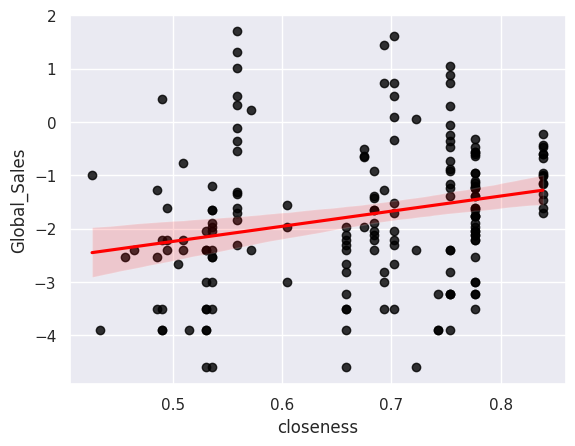

In [71]:
sns.regplot(x=df_pro_suc['closeness'], y=np.log(df_pro_suc['Global_Sales']), scatter_kws={"color": "black"}, line_kws={"color": "red"});

In [72]:
result = reg.linear(data=df_pro_suc, formula='np.log(Global_Sales) ~ closeness')

In [73]:
result.nano_summary()

+2.839 (0.856) ***


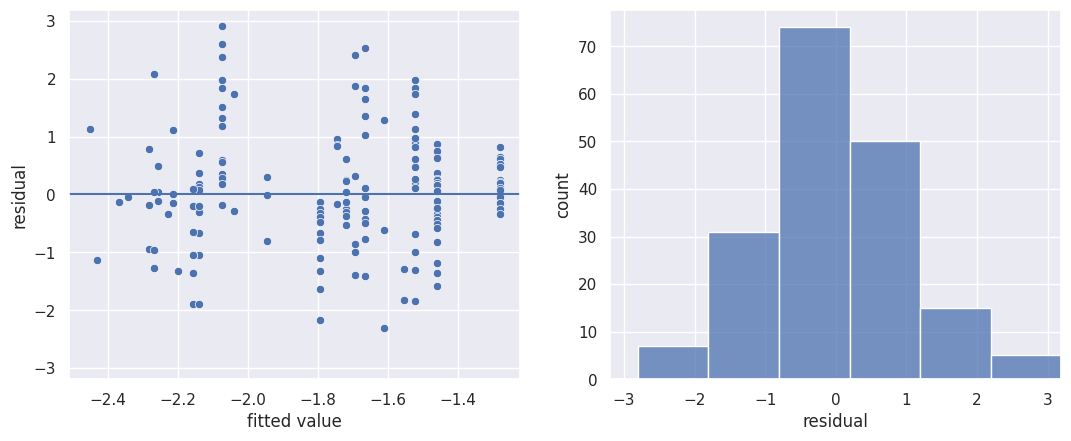

In [74]:
result.plot_residuals()